# Regression Homework
##### by Mehdi Lotfipour

### First Part

We start by importing main libraries:

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import random
import itertools

Now we look at dataset to check if there is any problem with that:

In [2]:
#reading data and first check

df = pd.read_table('Data/auto-mpg.data')
display(df.head())

,18.0 8 307.0 130.0 3504. 12.0 70 1,chevrolet chevelle malibu
0,15.0 8 350.0 165.0 3693. 11...,buick skylark 320
1,18.0 8 318.0 150.0 3436. 11...,plymouth satellite
2,16.0 8 304.0 150.0 3433. 12...,amc rebel sst
3,17.0 8 302.0 140.0 3449. 10...,ford torino
4,15.0 8 429.0 198.0 4341. 10...,ford galaxie 500


The main Dataset has several problems:
    1. There is no header and no feature names
    2. There are only 2 columns, but should be 9
    3. Separators aren't well defined
So we use header = None and delimiter = r"\s+" in our command and check it again:

In [3]:
#making dataframe

df = pd.read_table('auto-mpg.data', header=None, delimiter=r"\s+")
display(df.head())

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


Now we have to change the column names to features of interest. We find them by checking the data source.

In [4]:
#renaming the column names

df = df.rename({0:'mpg', 1:'cylinders', 2:'displacement',
           3:'horsepower', 4:'weight', 5:'acceleration',
           6:'model year', 7:'origin', 8:'car name'}, axis=1)
display(df.head())

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


It's time to check for missing values:

In [5]:
#getting info about data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 27.7+ KB


There are 392 data points and there are 392 non-missing value for each feature. So all of them are numbers. Then we see the minimum of each columns to check if there is any zero instead of a number:

In [6]:
#checking minimum of each feature

print(df.min())

mpg                                   9
cylinders                             3
displacement                         68
horsepower                           46
weight                             1613
acceleration                          8
model year                           70
origin                                1
car name        amc ambassador brougham
dtype: object


There isn't any zero, now we are sure that all data are fine and there is no need to take care of missing values. Next step is to normalizing the data. This step is done due to different ranges in each features. After normalization, each feature has a "0" mean and each "1" unit corresponds to one standard deviation from the mean.

We use the formula for each data point x[ i ]:
##### normalized x[ i ] = (x[ i ] - mean of x) / standard deviation of x

In [7]:
#normalizing the elements

for col in ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']:
    df[col] = (df[col] - df[col].mean())/df[col].std()
display(df.head())

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,-0.697747,1.482053,1.075915,0.663285,0.619748,-1.283618,-1.623241,-0.715726,chevrolet chevelle malibu
1,-1.082115,1.482053,1.486832,1.572585,0.842258,-1.464852,-1.623241,-0.715726,buick skylark 320
2,-0.697747,1.482053,1.181033,1.182885,0.539692,-1.646086,-1.623241,-0.715726,plymouth satellite
3,-0.953992,1.482053,1.047246,1.182885,0.536160,-1.283618,-1.623241,-0.715726,amc rebel sst
4,-0.825870,1.482053,1.028134,0.923085,0.554997,-1.827320,-1.623241,-0.715726,ford torino


We move to numpy and make an array from the dataframe. From now we divide our dataset to two parts. We select 100 data points for training and keep the rest for testing phase. Selecting the first 100 data points are inappropriate because data is sorted by model year. So we choose 100 numbers from a uniform random variable and use it for picking data points.

In [8]:
#making an array from dataframe, removing the car name and setting all data types to float64

x = df.values
x = x[:, :-1]
x = x.astype('float64')

#generating 100 random numbers as selectors

index_train = random.sample(range(392), 100)
index_test = list(set(range(392)) - set(index_train))

#dividing the data into two matrices and two target vectors

train_data, train_target = x[index_train, :], x[index_train, 0]
test_data, test_target = x[index_test, :], x[index_test, 0]

#changing first column from 'mpg' to 'bias' by changing all values to one

train_data[:, 0] = 1
test_data[:, 0] = 1

Now we have to define a function to takes data and polynomial degree, then returns the terms of polynomial basis functions which we know as 'z-table'. Then we use this table in next round to compute weights vector.

In [9]:
#this solution is for general case
#this function makes z-table from input data and degree size

def poly_basis_fun_term(x, m):
    
    #making all possible combination of terms and keeping its size in term_size
    
    terms = list(itertools.combinations_with_replacement(list(range(x.shape[1])), m))
    terms_size = len(terms)
    
    #getting number of data points
    
    n = x.shape[0]
    
    #constructing z array with ones at first
    
    z = np.ones([n,terms_size])
    
    #changing z columns with respect to combinations and input data
    
    count = 0
    for i in terms:
        v = np.ones(n)
        for j in i:
            v = v * x[:, j]
        z[:, count] = v
        count += 1
    
    return z

For this homework, we only use power of each variable as terms of basis function and do not use their multiplication. Using this method will cause singular matrices, so we dont use it.

In [ ]:
#this solution is for homework, but we dont use it because of making singular matrices
#this function makes z table from input data and degree size

'''
def poly_basis_fun_term(x,m):
    
    #getting number of data points and number of variables
    
    n = x.shape[0]
    d = x.shape[1]
    
    #constructing z array with ones at first
    
    z = np.ones([n,1 + d * m])
    
    #changing z columns
    
    count = 0
    z[:, 0] = 1
    for i in range(1,m+1):
        for j in range(d):
            z[:, (i-1) * d + (j+1)] = x[:, j] ** i
    
    return z
'''

Now we have our z-table and a target vector. We define a function that takes the data, target, polynomial degree and landa as inputs and evaluate the weights vector. Inside the function, it calls poly_basis_fun_term() to turn the input data to "z-table". Then we use the formula:

##### w = (landa.identity + z(t).z)^(-1) . (z(t).y)

where y is target and z is polynomial terms of input data with respect to m which we get from poly_basis_fun_term(). 

In [10]:
#this function takes z table, target, degree and landa regularization constant
#and return the weights vector

def w_poly_fitter(x, y, m, landa):
    
    z = poly_basis_fun_term(x, m)
    ztz = np.identity(z.shape[1]) * int(landa) + np.matmul(z.transpose(), z)
    ztz_inv = np.linalg.inv(ztz)                        
    w = np.matmul(z.transpose(), y)
    w = np.matmul(ztz_inv, w)
    
    return w

Now it's time to use our w vector. We define a function that uses data, weights vector and polynomial degree and return its estimation:

In [11]:
#this function takes data and calculated weights and degree
# and return the estimation of target

def poly_predict(x, w, m):
    
    z = poly_basis_fun_term(x, m)

    return np.matmul(z, w)

We need a function to takes two vector, in this case our estimation and real target values, and return the error. We use root mean square as error and its formula is:

##### E-rms = square root of (inner product of two vectors / number of data points)

In [12]:
#this function takes two vector, one as estimation and one as target, then returns the error

def rmse(y_target, y_estimate):
    
    return (sum((y_target - y_estimate) ** 2) / y_target.shape[0])**0.5

In this section we want to see how polynomial degree affect our train and test error:

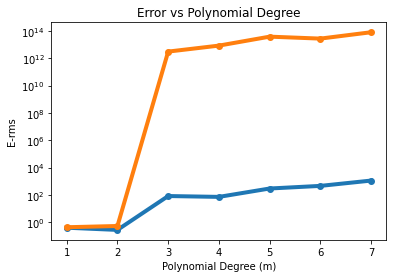

In [13]:
#different polynomial degree

result = np.ones([8,3])

for i in range(1, 8):
    #find the best w
    w = w_poly_fitter(train_data, train_target, i, 0)
    
    #estimate on train and test set
    train_estimate = poly_predict(train_data, w, i)
    test_estimate = poly_predict(test_data, w, i)
    
    #saving the result
    result[i,0] = i
    result[i,1] = rmse(train_estimate, train_target)
    result[i,2] = rmse(test_estimate, test_target)
    
#plotting the result
plt.title('Error vs Polynomial Degree')
plt.plot(result[1:,0],result[1:,1], marker = '.', lw = 4, mew = 4)
plt.plot(result[1:,0],result[1:,2], marker = '.', lw = 4, mew = 4)
plt.ylabel('E-rms')
plt.xlabel('Polynomial Degree (m)')
plt.yscale('log')
plt.show()

##### This plot shows that in second degree we have overfitting problem and for degrees higher than two, we wont get a good result.

Now we want to see the relation between one feature and target:

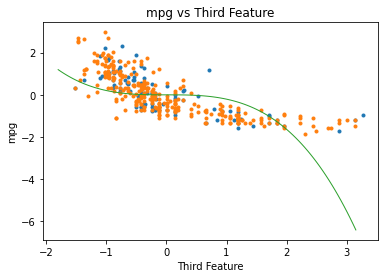

In [14]:
#regression with one feature

#making a t vector to show later for our curve
t = np.arange(-1.8, 3.2, 0.05).reshape((100, 1))
m = 3

#finding the best w for third feature
w = w_poly_fitter(train_data[:,4:5], train_target, m, 0)

#estimate on train and test set and on t vector
train_estimate = poly_predict(train_data[:,4:5], w, m)
test_estimate = poly_predict(test_data[:,4:5], w, m)
curve = poly_predict(t, w, m)

#plotting the result
plt.title('mpg vs Third Feature')
plt.plot(train_data[:,3],train_target, marker = '.', lw = 0)
plt.plot(test_data[:,3],test_target, marker = '.', lw = 0)
plt.plot(t,curve, lw = 1)
plt.ylabel('mpg')
plt.xlabel('Third Feature')
plt.show()

##### The blue and orange dots represents train and test dataset and the green line is our learned fitted polynomial curve.
important note: we used third degree instead of 8th, because of better result.

Last part is to see the effect of different landa values on error of estimation:

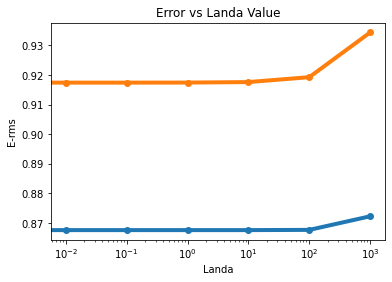

In [15]:
#different landa values

m = 3
result = np.ones([7,3])
count = 0

for landa in ([0, 0.01, 0.1, 1, 10, 100, 1000]):
    #find the best w
    w = w_poly_fitter(train_data[:,3:4], train_target, m, landa)
    
    #estimate on train and test set
    train_estimate = poly_predict(train_data[:,3:4], w, m)
    test_estimate = poly_predict(test_data[:,3:4], w, m)
    
    #saving the result
    result[count,0] = landa
    result[count,1] = rmse(train_estimate, train_target)
    result[count,2] = rmse(test_estimate, test_target)
    
    count += 1

#plotting the result
plt.title('Error vs Landa Value')
plt.plot(result[:,0],result[:,1], marker = '.', lw = 4, mew = 4)
plt.plot(result[:,0],result[:,2], marker = '.', lw = 4, mew = 4)
plt.ylabel('E-rms')
plt.xlabel('Landa')
plt.xscale('log')
plt.show()

##### By increasing the landa value, our error will get bigger.

### Second Part

When working with normalized dataset, evaluating its covariance matrix is easy. We need to multiply its transpose by itself.

In [16]:
#this function takes a normalized dataset and return its covariance matrix
def covar_mat(x):
    
    return np.matmul(x.transpose(), x)

Now we have to define a function to takes data and center of kernel function and its radiuses, then returns the terms of gaussian basis functions which we know as 'z-table'. Then we use this table in next round to compute weights vector.

In [17]:
#this function makes z-table from input data, centers and s
def gaus_basis_fun_term(x, centers, kw):
    
    z = np.ones([len(x), len(centers)])
    covar_inv = np.linalg.inv(covar_mat(x))
    count = 0
    for center in centers:
        for i in range(len(x)):
            term = np.matmul(covar_inv, (x[i,:] - center))
            term = -(1/2) * np.matmul((x[i,:] - center).transpose() , term)
            z[i, count] = np.exp(term / 2 * kw ** 2)
        count += 1
    
    return z

We have to use random datapoint as centers. So we define a function which takes a dataset and return n datapoints by random.

In [18]:
#this function takes a dataset and return n radom sample of that dataset
def center_select(x, n):
    
    index = random.sample(range(len(x)), n)
    
    return x[index,:]

In [19]:
def w_gaus_fitter(x, y, centers, kw, landa):
    
    z = gaus_basis_fun_term(x, centers, kw)
    ztz = np.identity(z.shape[1]) * int(landa) + np.matmul(z.transpose(), z)
    ztz_inv = np.linalg.inv(ztz)                        
    w = np.matmul(z.transpose(), y)
    w = np.matmul(ztz_inv, w)
    return w

In [20]:
#this function takes data and calculated weights
# and return the estimation of target
def gaus_predict(x, w, centers, kw):
    
    z = gaus_basis_fun_term(x, centers, kw)
    return np.matmul(z, w)

In this section we want to see how number of kernel functions affect our train and test error:

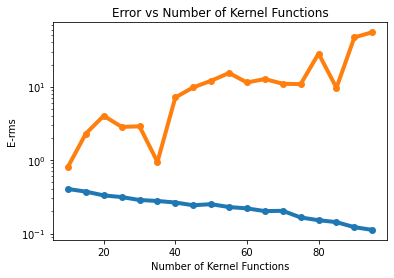

In [21]:
#different basis function without regularization
count = 0
result = np.ones([19,3])
for i in range(5,100,5):
    cen = center_select(train_data, i)
    
    w = w_gaus_fitter(train_data, train_target, cen, 2, 0)
    
    train_estimate = gaus_predict(train_data, w, cen, 2)
    test_estimate = gaus_predict(test_data, w, cen, 2)
    
    result[count,1] = rmse(train_estimate, train_target)
    result[count,2] = rmse(test_estimate, test_target)
    result[count,0] = i
    
    count += 1
    
#plotting the result
plt.title('Error vs Number of Kernel Functions')
plt.plot(result[1:,0],result[1:,1], marker = '.', lw = 4, mew = 4)
plt.plot(result[1:,0],result[1:,2], marker = '.', lw = 4, mew = 4)
plt.ylabel('E-rms')
plt.xlabel('Number of Kernel Functions')
plt.yscale('log')
plt.show()

##### When we increase the number of kernel function, our model fits better on train set, and test set error get larger. In this plot, blue line is the training phase error and the orange one is for testing.

For the last section we want to see how landa changes the estimation error:

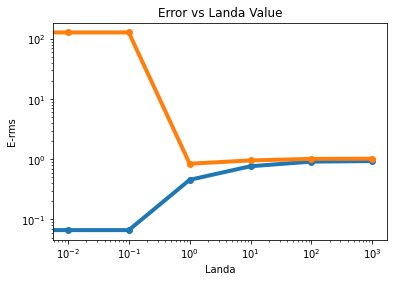

In [22]:
#different landa values with 90 basis function

count = 0
result = np.ones([7,3])
#we use one set of centers for all landa value
cen = center_select(train_data, i)

for landa in ([0, 0.01, 0.1, 1, 10, 100, 1000]):
    result[count,0] = landa
    
    w = w_gaus_fitter(train_data, train_target, cen, 2, landa)
    
    train_estimate = gaus_predict(train_data, w, cen, 2)
    test_estimate = gaus_predict(test_data, w, cen, 2)
    
    result[count,1] = rmse(train_estimate, train_target)
    result[count,2] = rmse(test_estimate, test_target)
    
    count += 1

#plotting the result
plt.title('Error vs Landa Value')
plt.plot(result[:,0],result[:,1], marker = '.', lw = 4, mew = 4)
plt.plot(result[:,0],result[:,2], marker = '.', lw = 4, mew = 4)
plt.ylabel('E-rms')
plt.xlabel('Landa')
plt.xscale('log')
plt.yscale('log')
plt.show()

##### As we see, for larger value of landa we have more modeate result. Our train error gets bigger, but we have a better prediction for test set. Infact our model fits better by increasing landa in this range.